In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
year = 2001

In [3]:
base_runner_codes = {
    0: "OOO", # No one on
    1: "XOO", # runner on 1st
    2: "OXO", # runner on 2nd
    3: "XXO", # runners on 1st & 2nd
    4: "OOX", # runner on 3d
    5: "XOX", # runners on 1st & 3rd
    6: "OXX", # runners on 2nd & 3rd
    7: "XXX"  # bases loaded
}

## Load Data

### Load Events

In [4]:
events = pd.read_csv('../data/mlb_pxp/csv/events-{}.csv.gz'.format(year))
events['START_BASES_CD'].replace(base_runner_codes, inplace=True)
events['END_BASES_CD'].replace(base_runner_codes, inplace=True)
events.head(10)

/usr/local/var/pyenv/versions/3.6.1/envs/data8/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (63,64,65,84,85) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,GAME_ID,AWAY_TEAM_ID,INN_CT,BAT_HOME_ID,OUTS_CT,BALLS_CT,STRIKES_CT,PITCH_SEQ_TX,AWAY_SCORE_CT,HOME_SCORE_CT,...,RUN2_FATE_ID,RUN3_FATE_ID,FATE_RUNS_CT,ASS6_FLD_CD,ASS7_FLD_CD,ASS8_FLD_CD,ASS9_FLD_CD,ASS10_FLD_CD,UNKNOWN_OUT_EXC_FL,UNCERTAIN_PLAY_EXC_FL
0,ANA200104100,TEX,1,0,0,0,1,CX,0,0,...,0,0,0,0,0,0,0,0,F,F
1,ANA200104100,TEX,1,0,1,1,2,CBSFX,0,0,...,0,0,0,0,0,0,0,0,F,F
2,ANA200104100,TEX,1,0,2,2,2,CCBBX,0,0,...,0,0,0,0,0,0,0,0,F,F
3,ANA200104100,TEX,1,1,0,0,1,CX,0,0,...,0,0,0,0,0,0,0,0,F,F
4,ANA200104100,TEX,1,1,0,1,2,CBSX,0,0,...,0,0,0,0,0,0,0,0,F,F
5,ANA200104100,TEX,1,1,0,3,2,FSFBBBS,0,0,...,0,0,0,0,0,0,0,0,F,F
6,ANA200104100,TEX,1,1,2,3,1,CBBBB,0,0,...,0,0,0,0,0,0,0,0,F,F
7,ANA200104100,TEX,1,1,2,2,0,BBX,0,0,...,0,0,0,0,0,0,0,0,F,F
8,ANA200104100,TEX,2,0,0,3,2,CBBBFB,0,0,...,0,0,4,0,0,0,0,0,F,F
9,ANA200104100,TEX,2,0,0,2,1,FBBX,0,0,...,0,0,4,0,0,0,0,0,F,F


In [5]:
events[['START_BASES_CD', 'END_BASES_CD']].head(10)

,START_BASES_CD,END_BASES_CD
0,OOO,OOO
1,OOO,OOO
2,OOO,OOO
3,OOO,XOO
4,XOO,XXO
5,XXO,OOX
6,OOX,XOX
7,XOX,XOX
8,OOO,XOO
9,XOO,XOO


### Load Run Expectancy

In [6]:
re = pd.read_csv(
    '../data/mlb_pxp/re/re-{}.csv'.format(year),
    index_col=['outs', 'base_runners'],
    squeeze=True
)
re.unstack(level=0)

outs,0,1,2
base_runners,,,
OOO,0.534398,0.287615,0.115926
OOX,1.517361,0.978937,0.371765
OXO,1.170798,0.709402,0.350608
OXX,2.037258,1.426960,0.606677
XOO,0.924838,0.551041,0.247213
XOX,1.847567,1.259955,0.526990
XXO,1.526802,0.916667,0.437080
XXX,2.346912,1.598430,0.804176


In [7]:
idx = list(zip(events['OUTS_CT'], events['START_BASES_CD']))
events['RUN_POT'] = re.loc[idx].values

next_outs = events['OUTS_CT'] + events['EVENT_OUTS_CT']
idx = list(zip(next_outs, events['END_BASES_CD']))
events['RUN_POT_NEXT'] = re.loc[idx].values
events['RUN_POT_NEXT'].fillna(0, inplace=True)

In [8]:
events[['RUN_POT', 'RUN_POT_NEXT']].head(10)

,RUN_POT,RUN_POT_NEXT
0,0.534398,0.287615
1,0.287615,0.115926
2,0.115926,0.000000
3,0.534398,0.924838
4,0.924838,1.526802
5,1.526802,0.371765
6,0.371765,0.526990
7,0.526990,0.000000
8,0.534398,0.924838
9,0.924838,0.551041


In [9]:
events['RUN_VALUE'] = events['RUN_POT_NEXT'] - events['RUN_POT'] + events['EVENT_RUNS_CT']

In [10]:
events[['RUN_VALUE']].head(20)

,RUN_VALUE
0,-0.246783
1,-0.171689
2,-0.115926
3,0.390440
4,0.601964
5,-1.155038
6,0.155225
7,-0.526990
8,0.390440
9,-0.373797


In [11]:
bat_mask = (events['BAT_EVENT_FL'] == "T")

In [12]:
bonds_cd = 'bondb001'
bonds_mask = (events['BAT_ID'] == bonds_cd)
cols = ['START_BASES_CD', 'END_BASES_CD', 'RUN_POT', 'RUN_POT_NEXT', 'EVENT_RUNS_CT', 'RUN_VALUE']
events.loc[bat_mask & bonds_mask][cols].head()

,START_BASES_CD,END_BASES_CD,RUN_POT,RUN_POT_NEXT,EVENT_RUNS_CT,RUN_VALUE
8259,XOO,XOO,0.551041,0.247213,0,-0.303827
8279,OOO,OOO,0.534398,0.534398,1,1.000000
8298,OOO,OOO,0.287615,0.115926,0,-0.171689
8315,OOO,OOO,0.115926,0.000000,0,-0.115926
8328,OOO,XOO,0.115926,0.247213,0,0.131287


In [35]:
batter_data = events.loc[bat_mask].\
    groupby('BAT_ID')['RUN_POT', 'RUN_VALUE'].\
    sum().\
    sort_values('RUN_VALUE', ascending=False)

In [36]:
pa_ct = events.loc[bat_mask].\
    groupby('BAT_ID')['EVENT_ID'].\
    count()
qualified = pa_ct > 400

batter_data['PA_CT'] = pa_ct

batter_data['RUN_POT_PER_PA'] = batter_data['RUN_POT'] / pa_ct
batter_data['RUN_VALUE_PER_PA'] = batter_data['RUN_VALUE'] / pa_ct

In [37]:
batter_data['RUN_CONV_PCT'] = batter_data['RUN_VALUE'] / batter_data['RUN_POT']
batter_data['RUN_POT_SF'] = batter_data['RUN_POT'] - batter_data['RUN_VALUE']
batter_data['RUN_POT_SF_PER_PA'] = batter_data['RUN_POT_SF'] / pa_ct

In [38]:
def most_common_element(s):
    return s.value_counts().index[0]

batter_data['lineup_pos'] = events.loc[bat_mask].\
    groupby('BAT_ID')['BAT_LINEUP_ID'].\
    apply(most_common_element)

In [39]:
batter_data.head(20)

,RUN_POT,RUN_VALUE,PA_CT,RUN_POT_PER_PA,RUN_VALUE_PER_PA,RUN_CONV_PCT,RUN_POT_SF,RUN_POT_SF_PER_PA,lineup_pos
BAT_ID,,,,,,,,,
bondb001,329.167273,115.014914,664,0.495734,0.173215,0.349412,214.152359,0.322519,3
sosas001,389.935943,87.543377,711,0.548433,0.123127,0.224507,302.392566,0.425306,3
giamj001,347.249770,86.750975,671,0.517511,0.129286,0.249823,260.498796,0.388225,3
berkl001,385.922987,76.935718,688,0.560935,0.111825,0.199355,308.987269,0.449109,4
heltt001,375.142339,74.589256,697,0.538224,0.107015,0.198829,300.553084,0.431210,4
gonzl001,373.571383,73.575086,728,0.513148,0.101065,0.196951,299.996297,0.412083,3
walkl001,315.056576,67.648279,601,0.524221,0.112560,0.214718,247.408297,0.411661,3
jonec004,334.482340,61.951219,677,0.494065,0.091508,0.185215,272.531122,0.402557,3
bagwj001,379.761397,61.864192,717,0.529653,0.086282,0.162903,317.897206,0.443371,3


In [45]:
batter_data.sort_values('RUN_VALUE_PER_PA', ascending=False).loc[qualified].head(20)

,RUN_POT,RUN_VALUE,PA_CT,RUN_POT_PER_PA,RUN_VALUE_PER_PA,RUN_CONV_PCT,RUN_POT_SF,RUN_POT_SF_PER_PA,lineup_pos
BAT_ID,,,,,,,,,
bondb001,329.167273,115.014914,664,0.495734,0.173215,0.349412,214.152359,0.322519,3
giamj001,347.249770,86.750975,671,0.517511,0.129286,0.249823,260.498796,0.388225,3
sosas001,389.935943,87.543377,711,0.548433,0.123127,0.224507,302.392566,0.425306,3
walkl001,315.056576,67.648279,601,0.524221,0.112560,0.214718,247.408297,0.411661,3
berkl001,385.922987,76.935718,688,0.560935,0.111825,0.199355,308.987269,0.449109,4
heltt001,375.142339,74.589256,697,0.538224,0.107015,0.198829,300.553084,0.431210,4
gonzl001,373.571383,73.575086,728,0.513148,0.101065,0.196951,299.996297,0.412083,3
jonec004,334.482340,61.951219,677,0.494065,0.091508,0.185215,272.531122,0.402557,3
edmoj001,319.683521,54.490399,608,0.525795,0.089622,0.170451,265.193123,0.436173,3


In [40]:
batter_data.sort_values('RUN_POT_PER_PA', ascending=False).loc[qualified].head(20)

,RUN_POT,RUN_VALUE,PA_CT,RUN_POT_PER_PA,RUN_VALUE_PER_PA,RUN_CONV_PCT,RUN_POT_SF,RUN_POT_SF_PER_PA,lineup_pos
BAT_ID,,,,,,,,,
aloum001,348.104481,36.100699,581,0.599147,0.062135,0.103707,312.003782,0.537012,5
boonb002,408.902156,40.549588,690,0.592612,0.058768,0.099167,368.352568,0.533844,5
camem001,369.642785,18.107972,633,0.583954,0.028607,0.048988,351.534813,0.555347,6
gonzj002,347.174999,38.454664,595,0.583487,0.064630,0.110764,308.720336,0.518858,4
sandr002,279.617644,14.193419,496,0.563745,0.028616,0.050760,265.424225,0.535129,6
dye-j001,380.430017,15.067037,675,0.563600,0.022322,0.039605,365.362980,0.541278,4
hidar001,334.022585,5.883243,593,0.563276,0.009921,0.017613,328.139342,0.553355,6
olerj001,382.052589,38.733506,679,0.562669,0.057045,0.101383,343.319083,0.505625,4
berkl001,385.922987,76.935718,688,0.560935,0.111825,0.199355,308.987269,0.449109,4


In [42]:
batter_data.sort_values('RUN_POT_SF_PER_PA', ascending=True).loc[qualified].head(20)

,RUN_POT,RUN_VALUE,PA_CT,RUN_POT_PER_PA,RUN_VALUE_PER_PA,RUN_CONV_PCT,RUN_POT_SF,RUN_POT_SF_PER_PA,lineup_pos
BAT_ID,,,,,,,,,
bondb001,329.167273,115.014914,664,0.495734,0.173215,0.349412,214.152359,0.322519,3
giamj001,347.249770,86.750975,671,0.517511,0.129286,0.249823,260.498796,0.388225,3
jonec004,334.482340,61.951219,677,0.494065,0.091508,0.185215,272.531122,0.402557,3
walkl001,315.056576,67.648279,601,0.524221,0.112560,0.214718,247.408297,0.411661,3
gonzl001,373.571383,73.575086,728,0.513148,0.101065,0.196951,299.996297,0.412083,3
sosas001,389.935943,87.543377,711,0.548433,0.123127,0.224507,302.392566,0.425306,3
alomr001,347.458333,59.420607,677,0.513232,0.087770,0.171015,288.037726,0.425462,3
rodra001,373.344172,60.060724,732,0.510033,0.082050,0.160872,313.283448,0.427983,3
grees001,358.493866,58.020287,701,0.511404,0.082768,0.161845,300.473579,0.428636,4


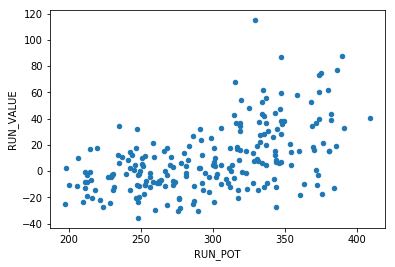

In [43]:
batter_data.loc[qualified].plot.scatter(x='RUN_POT', y='RUN_VALUE')

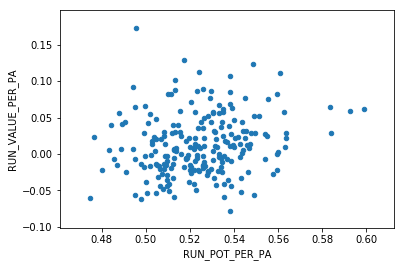

In [44]:
batter_data.loc[qualified].plot.scatter(x='RUN_POT_PER_PA', y='RUN_VALUE_PER_PA')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x116cf0160>]], dtype=object)

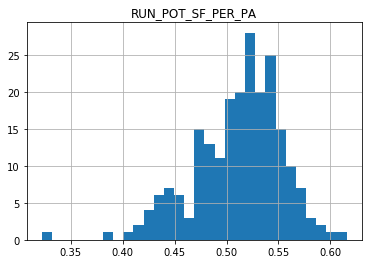

In [53]:
batter_data.loc[qualified].hist(column='RUN_POT_SF_PER_PA', bins=30)

In [62]:
bat_order_vals = events.loc[bat_mask].\
    groupby('BAT_LINEUP_ID')['RUN_POT', 'RUN_VALUE'].\
    mean()
bat_order_vals.head(20)

,RUN_POT,RUN_VALUE
BAT_LINEUP_ID,,
1,0.505240,-0.009361
2,0.515066,-0.002581
3,0.515479,0.055487
4,0.545756,0.036523
5,0.541311,0.013520
6,0.529262,-0.003753
7,0.523216,-0.015050
8,0.518143,-0.027806
9,0.513361,-0.072549


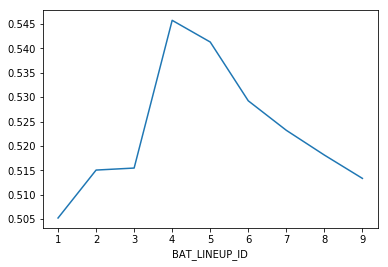

In [64]:
bat_order_vals['RUN_POT'].plot();

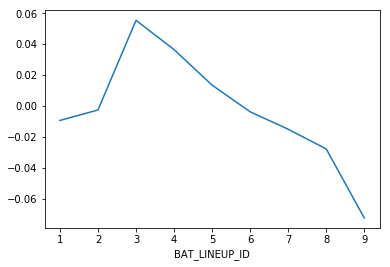

In [65]:
bat_order_vals['RUN_VALUE'].plot();

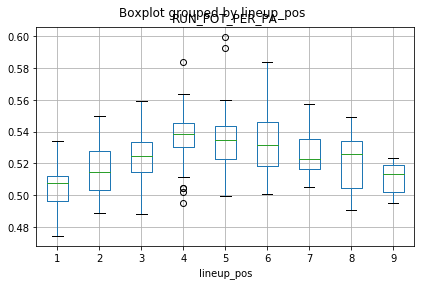

In [59]:
batter_data.loc[qualified].boxplot(by='lineup_pos', column='RUN_POT_PER_PA')
plt.tight_layout();

In [68]:
third = (batter_data['lineup_pos'] == 8)
batter_data.loc[qualified & third].sort_values('RUN_POT_PER_PA', ascending=False)

,RUN_POT,RUN_VALUE,PA_CT,RUN_POT_PER_PA,RUN_VALUE_PER_PA,RUN_CONV_PCT,RUN_POT_SF,RUN_POT_SF_PER_PA,lineup_pos
BAT_ID,,,,,,,,,
ordor001,277.375359,-28.158220,505,0.549258,-0.055759,-0.101517,305.533578,0.605017,8
martr003,242.201839,-14.668339,446,0.543053,-0.032889,-0.060562,256.870178,0.575942,8
ausmb001,248.006456,-35.761755,461,0.537975,-0.077574,-0.144197,283.768211,0.615549,8
milld002,227.217790,-4.839385,425,0.534630,-0.011387,-0.021298,232.057175,0.546017,8
halts001,269.813201,4.990317,507,0.532176,0.009843,0.018495,264.822884,0.522333,8
bross001,252.573951,-10.857584,478,0.528397,-0.022715,-0.042988,263.431534,0.551112,8
clayr001,256.243063,-12.099974,485,0.528336,-0.024948,-0.047221,268.343037,0.553285,8
andem003,300.716501,6.645120,574,0.523896,0.011577,0.022098,294.071381,0.512319,8
gonza002,285.882000,-24.984212,561,0.509594,-0.044535,-0.087393,310.866212,0.554129,8
